# Welcome in Communicate Data Findings project 

##                                        By *Abdelmenam Tarek Abdelmenam*

# data set overview 
## FordGoBike System Data Investigation
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area
#### columns 

- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
- member_birth_year
- member_gender
- bike_share_for_all_trip

In [1]:
# import needed libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # sett all graphes seaborn style

%matplotlib inline

# data wrangling process 

## data gathering 

- I downlod the data from this [link](https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv)
- i didn't downlod it programatily becuse it has abig size 28 MB and it will take time.
- I uploded the csv file to the nootbook here 

In [2]:
df = pd.read_csv('fordgobike-tripdata.csv')

print("this data has {} column and {} number of raws".format(df.shape[1] ,df.shape[0]))

this data has 16 column and 183412 number of raws


## data assesing 

### visual assement 
- I also use excel to see the whole data 

In [3]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


#### visual assesment report 
- there is some non important columns such as
    **[ end_time , start_station_id , end_station_id , bike_share_for_all_trip ]** in my opinon i will not use them 

- i want to make sure that every place with unique ID has one name 

### programmatic assesment 

###### check the data types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

- data types comment :-   start_time , end_time need to be timestamp 
                       bike_id need to be object 

##### check null values 

In [5]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

- null values comment :- there is sum null values but i will not deal with them 

##### check duplicates 

In [6]:
df.duplicated().sum()

0

- duplicates comment :- there is no duplicate raws 

###### check data validation 

In [7]:
df[['duration_sec' , 'member_birth_year']].describe()

,duration_sec,member_birth_year
count,183412.000000,175147.000000
mean,726.078435,1984.806437
std,1794.389780,10.116689
min,61.000000,1878.000000
25%,325.000000,1980.000000
50%,514.000000,1987.000000
75%,796.000000,1992.000000
max,85444.000000,2001.000000


- memebr birth year min doesn't make sense 1878 which mean in 2019 he was 141 years old 

In [8]:
df['member_gender'].unique()

array(['Male', nan, 'Other', 'Female'], dtype=object)

In [9]:
df['user_type'].unique()

array(['Customer', 'Subscriber'], dtype=object)

In [10]:
df['start_time'].min() , df['start_time'].max()

('2019-02-01 00:00:20.6360', '2019-02-28 23:59:18.5480')

In [11]:
len(df.groupby(['start_station_name' , 'start_station_id' ]).count().index) == df['start_station_id'].nunique()

True

In [12]:
len(df.groupby(['end_station_name' , 'end_station_id' ]).count().index) == df['end_station_id'].nunique()

True

- no any other invalid data

- i need a new column describing the age 
- we need a new column describing the distance

## data cleaning 

## make a new copy of the data set to clean

In [13]:
df_clean = df.copy()

##### define
- delete non important columns such as [ end_time , start_station_id , start_station_latitude , start_station_longitude , end_station_id , end_station_latitude end_station_longitude , bike_share_for_all_trip ] 


In [14]:
df_clean.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

##### code 

In [15]:
df_clean.drop([ 'end_time' , 'start_station_id' ,'end_station_id' ,'bike_share_for_all_trip' ] , axis=1 , inplace=True)

###### test

In [16]:
df_clean.columns

Index(['duration_sec', 'start_time', 'start_station_name',
       'start_station_latitude', 'start_station_longitude', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender'],
      dtype='object')

##### define 
convert data types  start_time  need from object to timestamp 
                convert  bike_id from int to object 

In [17]:
df_clean[['start_time' , 'bike_id' , 'user_type' , 'member_gender']].dtypes

start_time       object
bike_id           int64
user_type        object
member_gender    object
dtype: object

##### code

In [18]:
df_clean['start_time']= pd.to_datetime(df_clean['start_time'])
df_clean['bike_id'] = df_clean['bike_id'].astype(str)
df_clean['user_type'] = df_clean['user_type'].astype('category')
df_clean['member_gender'] = df_clean['member_gender'].astype('category')

##### test

In [19]:
df_clean[['start_time' , 'bike_id' , 'user_type' , 'member_gender']].dtypes

start_time       datetime64[ns]
bike_id                  object
user_type              category
member_gender          category
dtype: object

##### define 
invalid birth of year

In [20]:
(df_clean[df_clean['member_birth_year'] < 1934 ]['member_birth_year']).count()
# thats mean that they have more than 85 years old 

187

##### code 

In [21]:
df_clean = df_clean[df_clean['member_birth_year'] > 1934 ]

##### test 

In [22]:
(df_clean[df_clean['member_birth_year'] < 1934 ]['member_birth_year']).count()


0

#### make an age column 

In [23]:
df_clean['age'] = df_clean['start_time'].dt.year - df_clean['member_birth_year']
df_clean['age'] = df_clean['age'].astype('int')
df_clean.drop(['member_birth_year'] ,  axis=1 , inplace=True , )

In [24]:
df_clean['age'].describe()

count    174958.000000
mean         34.122801
std           9.877716
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max          81.000000
Name: age, dtype: float64

### distance column 

you can see the formela that i use to calcute the distance [here](https://en.wikipedia.org/wiki/Haversine_formula)
dlat = math.radians(lat2 - lat1)
    dlong = math.radians(long2 - long1)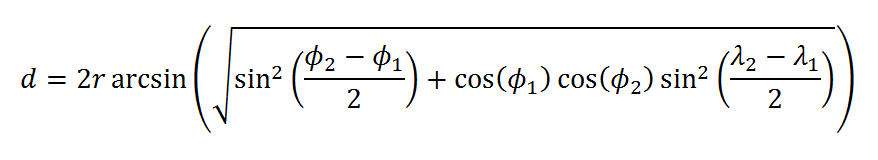

In [25]:
latidude_diff = np.radians( np.array((df_clean['start_station_latitude']  -  df_clean['end_station_latitude']).values ))
langitude_diff = np.radians(  np.array((df_clean['start_station_longitude'] - df_clean['end_station_longitude']  ).values))
radius = 6371 # earth raduis in killometers 
start_latidude = np.array(df_clean['start_station_latitude'].values)
end_latidude = np.array(df_clean['end_station_latitude'].values)

term1 = (np.sin(latidude_diff / 2) * np.sin(latidude_diff / 2) + np.cos(np.radians(start_latidude)) * np.cos(np.radians(end_latidude)) * np.sin(langitude_diff / 2) * np.sin(langitude_diff / 2))
term2 = 2 * np.arctan2(np.sqrt(term1), np.sqrt(1 - term1))
df_clean['distance'] = radius * term2


In [26]:
df_clean.drop( ['start_station_latitude' ,'end_station_latitude' , 'start_station_longitude' , 'end_station_longitude' ]  , axis=1 , inplace=True )

In [27]:
df_clean['distance'].describe()

count    174958.000000
mean          1.689735
std           1.096646
min           0.000000
25%           0.910464
50%           1.429829
75%           2.222812
max          69.469241
Name: distance, dtype: float64

In [28]:
# the minimum duration is 61 sec and it's bigger than 1 minute so we can convert it to minutes 
df_clean['duration_min'] = df_clean['duration_sec'] / 60 
df_clean.drop('duration_sec' , inplace =True , axis=1 )
df_clean['duration_min'].describe()

count    174958.000000
mean         11.741926
std          27.373671
min           1.016667
25%           5.383333
50%           8.516667
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

In [29]:
# compute the speed 
df_clean['speed(km/hr)'] = df_clean['distance'] / (df_clean['duration_min'] / 60 )

In [30]:
df_clean['speed(km/hr)'].describe()

count    174958.000000
mean         10.834670
std           3.919664
min           0.000000
25%           8.722458
50%          11.070813
75%          13.365043
max          36.009974
Name: speed(km/hr), dtype: float64

In [31]:
df_clean.head()

,start_time,start_station_name,end_station_name,bike_id,user_type,member_gender,age,distance,duration_min,speed(km/hr)
0,2019-02-28 17:32:10.145,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,Male,35,0.544709,869.750000,0.037577
2,2019-02-28 12:13:13.218,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,Male,47,2.704545,1030.900000,0.157409
3,2019-02-28 17:54:26.010,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,Other,30,0.260739,608.166667,0.025724
4,2019-02-28 23:54:18.549,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,Male,45,2.409301,26.416667,5.472230
5,2019-02-28 23:49:58.632,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,Male,60,3.332203,29.883333,6.690424


#### save the clean data to a new file 

In [32]:
df_clean.to_csv('clean_data.csv',index=0)
df_clean.shape

(174958, 10)

## cleaned data report 
**i do some cleaning as drop some column greate some and change data types**

now i have 17958 rides  .
i have some information about tis rides .
*this information incluse*
- the satrt time of the trip
- the start and the end station name of the trip
- the bike id "every bike has an unique id
- user type cutomer or subscriber 
- the age of the user 
- user gender 
- trip duration in minutes 
- user speed 

#### what i interst in ....
- the number of bikes in the data 
- the speed with the age and the gender 
- the most popular start and end station 
- distribution of trips over days , month , hours 
- relation between age and other parameter 
- reltion of user type and ather parameters 
- ....etc

# Explaratory Data Analysis 

## insights that i explianed ...

- I LOOK at age , Speed , duration and distance distribution and get some results
- Study number of trips in different times as Different hour of the day…etc
- User classification counting “gender and type”
- Most common start and end station names
- Relation between customer type and trip duration and his speed
- Relation between customer gender and trip duration and his speed 
- find the relation between speed , duration and age
- relation between gender ad user type
- Relation between day and hour 
- Common start to end combination with more than 200 record
- relation between distance and other parameter 
 


##### how many unique bike they have ?

In [33]:
# insights 
print( 'the number of bikes is : ', df_clean['bike_id'].nunique())

the number of bikes is :  4635


### univariate visulization

##### LOOK at age distribution 


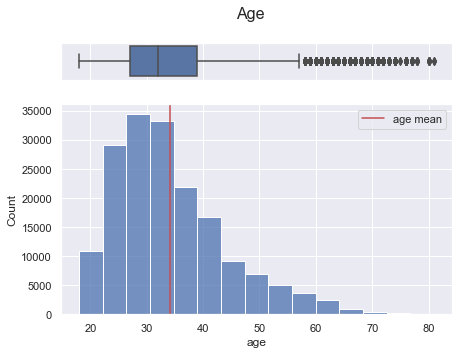

In [35]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)} , figsize=(7,5));

f.suptitle("Age", fontsize=16)

sns.histplot(x='age' , data = df_clean , ax=ax_hist , bins=15); 
ax_hist.axvline(df_clean['age'].mean() ,color='r' , label = 'age mean');
ax_hist.set_xlabel('age');
ax_hist.legend()
sns.boxplot(x='age' , data = df_clean ,  ax=ax_box);
ax_box.set_xlabel(' ');


##### age 
- age has right skewed distribution with mean of 34 and minimum age of 18 and maximum age of 81 
- the most common customer age is 31 
- with the increase of age the number of customer decrease 


### Speed , duration distance distributions

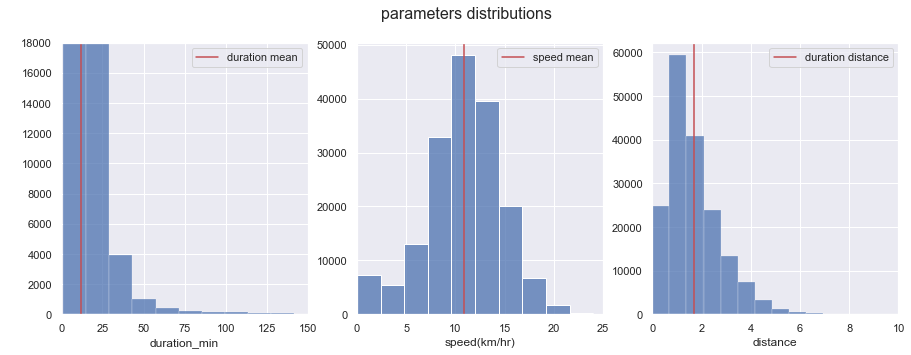

In [36]:
f, (ax1 , ax2 , ax3 ) = plt.subplots(nrows= 1, ncols=3 , figsize=(15,5));
f.suptitle("parameters distributions", fontsize=16)

sns.histplot(x='duration_min' , data = df_clean , ax=ax1 , bins=100);
ax1.set_ylim(0 , 18000)
ax1.set_xlim(0 , 150)
ax1.axvline(df_clean['duration_min'].mean() ,color='r' , label = 'duration mean');
ax1.set_xlabel('duration_min');
ax1.set_ylabel(' ');
ax1.legend();

sns.histplot(x='speed(km/hr)' , data = df_clean , ax=ax2 , bins=15);
ax2.set_xlim(0 , 25)
ax2.axvline(df_clean['speed(km/hr)'].mean() ,color='r' , label = 'speed mean');
ax2.set_xlabel('speed(km/hr)');
ax2.set_ylabel(' ');
ax2.legend();

sns.histplot(x='distance' , data = df_clean , ax=ax3 , bins=100);
ax3.set_xlim(0 , 10)
ax3.axvline(df_clean['distance'].mean() ,color='r' , label = 'duration distance');
ax3.set_xlabel('distance');
ax3.set_ylabel(' ');
ax3.legend();

##### comment
- duration has a common values from 0 to 25 min after that it has a right skewed distribution , and it has some outliers 
- Speed has a normal distribution with a mean 10.8 km/hr and a max speed 36 km/hrs 
- distance has a mean of 1.7 km ,the maximum is 69 km , and it has some outliers 


##### Study number of trips in different times 

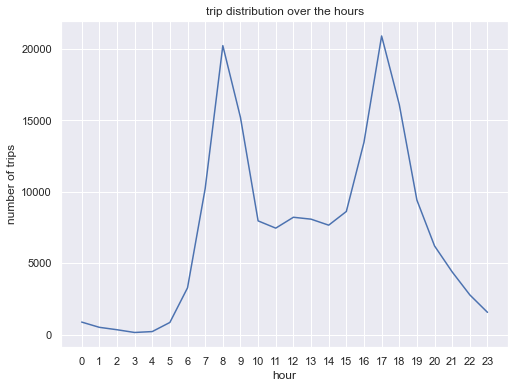

In [45]:
from matplotlib import rcParams
data = df_clean['start_time'].dt.hour.value_counts().sort_index()
plt.plot(data.index , data.values)
plt.xticks(range(0,24))
rcParams['figure.figsize'] =(8,6)
plt.title('trip distribution over the hours');
plt.xlabel('hour');
plt.ylabel('number of trips');

*Different hour of the day*
- There is some hours that have many number if trips which are 8 ,17 and I think this make sense because it’s time for work


### diffrent month day 

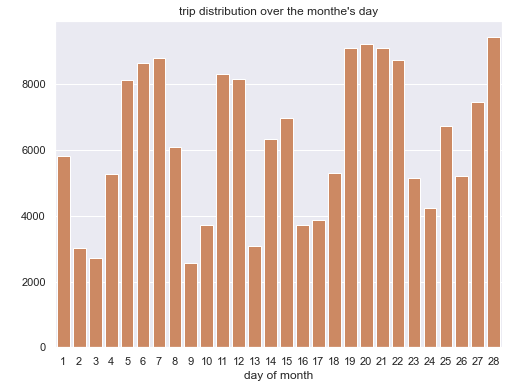

In [67]:
from matplotlib import rcParams
sns.countplot(x=df_clean['start_time'].dt.day , color=sns.color_palette()[1] ) ; 
rcParams['figure.figsize'] =(8,5)
plt.title('trip distribution over the monthe\'s day');
plt.xlabel('day of month');
plt.ylabel(' ');

*Different days of the month*
- There is some days of the month that  that have many number if trips as 28 , 20 and other days with small number of trips as 9


### diffrent week day

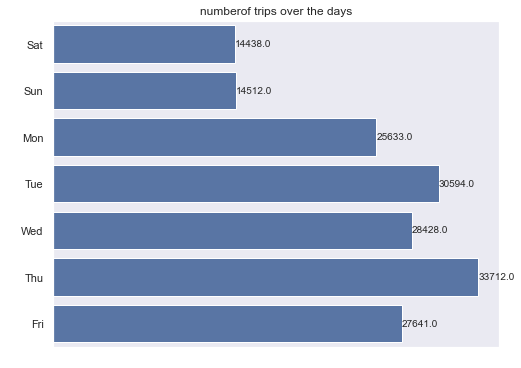

In [56]:
order_day = ['Sat' , 'Sun' , 'Mon' , 'Tue' , 'Wed' , 'Thu' , 'Fri']
sns.countplot(y=df_clean['start_time'].dt.strftime('%a') , color=sns.color_palette()[0] , order=order_day) ; 
rcParams['figure.figsize'] =(8,6)
plt.xlabel(' ')
plt.ylabel(' ')
plt.title('numberof trips over the days');

plt.xticks([])

type_counts = df_clean['start_time'].dt.strftime('%a').value_counts()
for i in range (type_counts.shape[0]):
    # Remember, type_counts contains the frequency of unique values in the `type` column in decreasing order.
    count = type_counts[order_day[i]]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}'.format(count)
    # Print the string value on the bar. 
    # Read more about the arguments of text() function [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html)
    plt.text(count+1, i, pct_string, va='center')

##### comment 
*Number of trips per week day*
- Thursday has the high number of trip in the week and Saturday has the least number of trips .
- In my opinion this related to the weekend  


##### values count of  user_type , member_gender

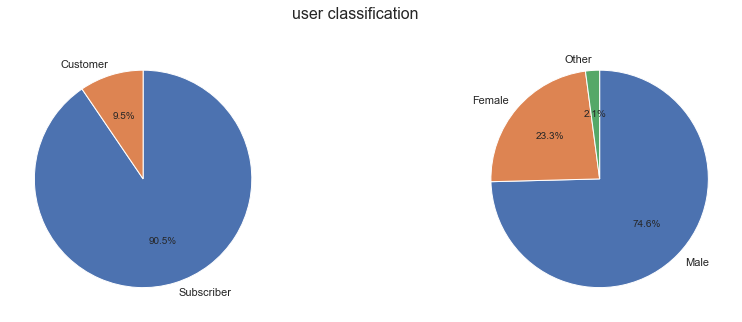

In [62]:
f, (ax1 , ax2 ) = plt.subplots(nrows= 1, ncols=2 , figsize=(15,5));
f.suptitle("user classification ", fontsize=16)

ax1.pie(x=df_clean['user_type'].value_counts().values ,labels =df_clean['user_type'].value_counts().index , startangle = 90, autopct= '%1.1f%%', counterclock = False);
ax2.pie(x=df_clean['member_gender'].value_counts().values ,labels =df_clean['member_gender'].value_counts().index , startangle = 90, autopct= '%1.1f%%', counterclock = False );

*User classification* 
- type :- Subscriber type is the most common type more than the customer type 
- Gender  :- Men love riding bike more than women so that’s normal that the number of men’s trips mor than number of women 


#####  Most common start and end station names “more than 1500 user “

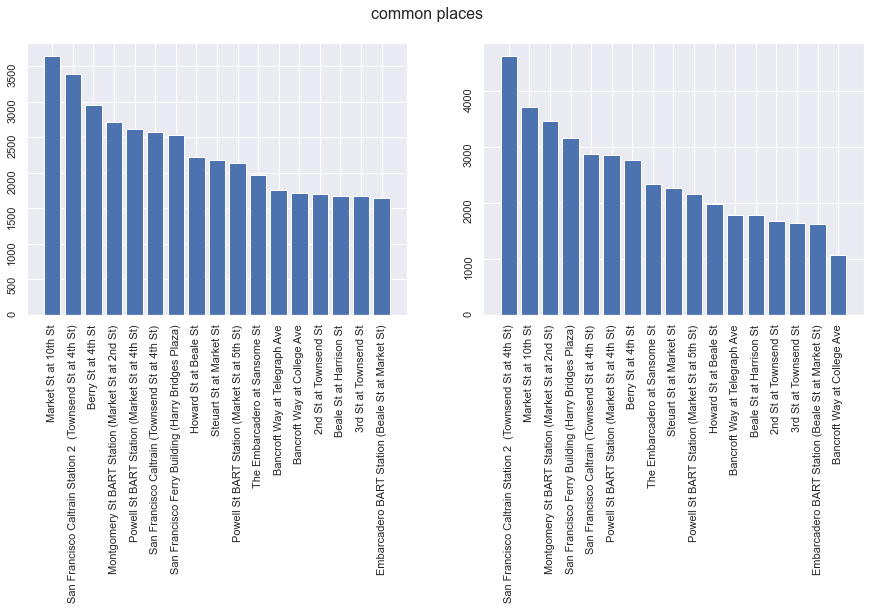

In [87]:
common_start = df_clean['start_station_name'].value_counts()[df_clean['start_station_name'].value_counts()>1500]
common_end = df_clean['end_station_name'].value_counts()[df_clean['start_station_name'].value_counts()>1500]

f, (ax1 , ax2 ) = plt.subplots(nrows= 1, ncols=2 , figsize=(15,5));
f.suptitle("common places  ", fontsize=16)

ax1.bar(common_start.index  , common_start.values );
ax1.tick_params(rotation = 90 )

ax2.bar(common_end.index  , common_end.values );
ax2.tick_params(rotation = 90 )


### Bivariate visulization

##### Relation between customer type and trip duration and his speed 

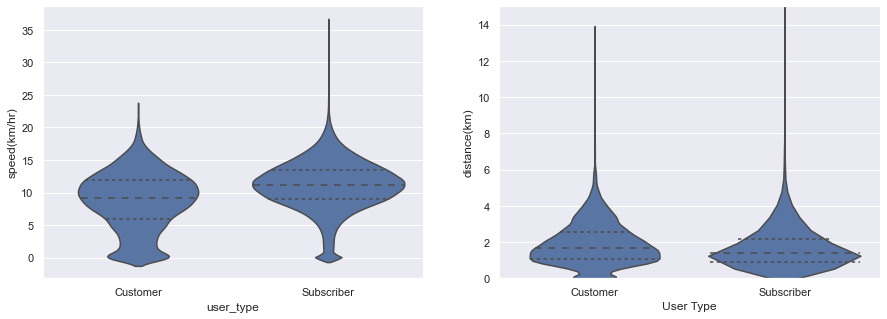

In [58]:
f, (ax1 , ax2  ) = plt.subplots(nrows= 1, ncols=2 , figsize=(15,5));

sns.violinplot(data=df_clean, x='user_type', y='speed(km/hr)', color=sns.color_palette()[0] , inner='quartile' , ax=ax1);
plt.xlabel('User Type');
plt.ylabel('speed');

sns.violinplot(data=df_clean, x='user_type', y='distance', color=sns.color_palette()[0] , inner='quartile' , ax=ax2);
ax2.set_ylim([0, 15])
plt.xlabel('User Type');
plt.ylabel('distance(km)');

- Customer travel in a small average compare to the subscriber and the normal also it has a wide range of speed rather than the customer  


##### Relation between customer gender and trip duration and his speed 



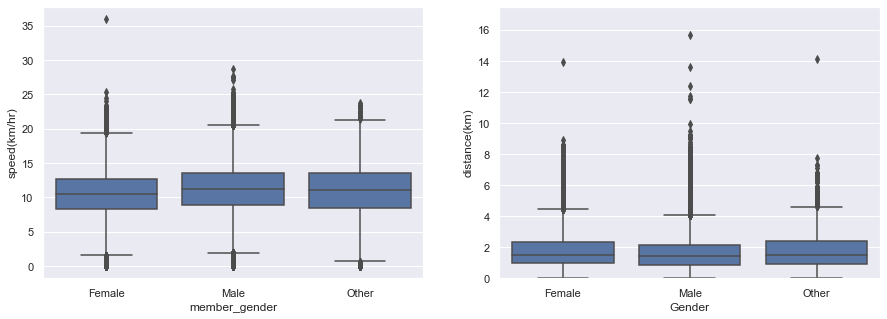

In [57]:
f, (ax1 , ax2  ) = plt.subplots(nrows= 1, ncols=2 , figsize=(15,5));

sns.boxplot(data=df_clean, x='member_gender', y='speed(km/hr)', color=sns.color_palette()[0] , ax=ax1);
plt.xlabel('Gender');
plt.ylabel('speed');

sns.boxplot(data=df_clean, x='member_gender', y='distance', color=sns.color_palette()[0] , ax=ax2 );
ax2.set_ylim([0, 17.5])
plt.xlabel('Gender');
plt.ylabel('distance(km)');

- Its clear that male has a bigger speed and longer trips than the female 


## find the relation between speed , duration and age 

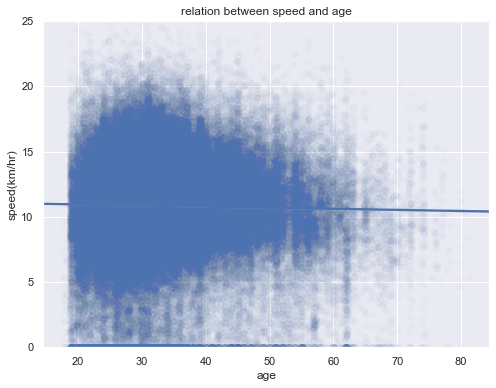

In [96]:
sns.regplot( x='age' , y='speed(km/hr)' , data=df_clean , truncate=False , x_jitter=0.3, scatter_kws={'alpha':1/50} );
plt.ylim(0,25) ;
plt.title('relation between speed and age');

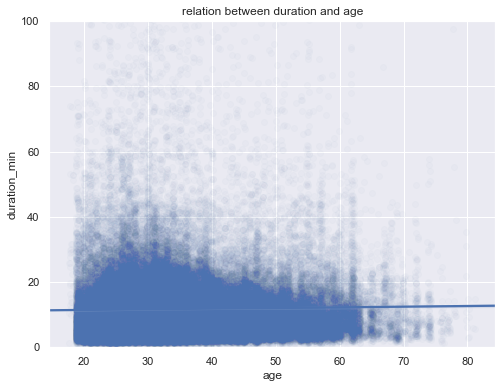

In [115]:
sns.regplot( x='age' , y='duration_min' , data=df_clean , truncate=False , x_jitter=0.3, scatter_kws={'alpha':1/50} );
plt.ylim(0,100) ;
plt.title('relation between duration and age');

- The duration decrease also with the increase of age as older people can’t ride for long times 
- The speed decrease with the increase of age and that a normal observation because it is a negative relation between the age and riding bike speed 


## relation between gender ad user type 

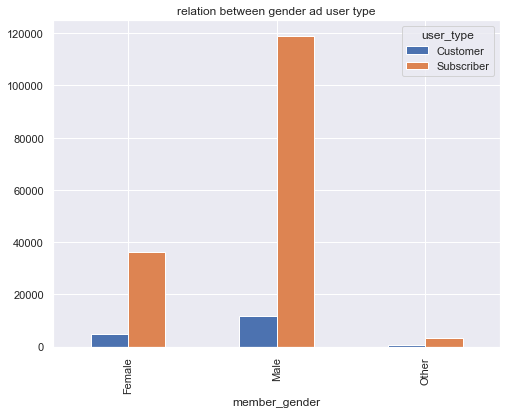

In [66]:
data = df_clean.groupby([ 'member_gender' , 'user_type' ]).count()['age']
data.unstack().plot(kind='bar', stacked=False);
plt.title('relation between gender ad user type') ;

- there is a relation between gender and type as all gender has many subscriber more than customer 

### Relation between day and hour 


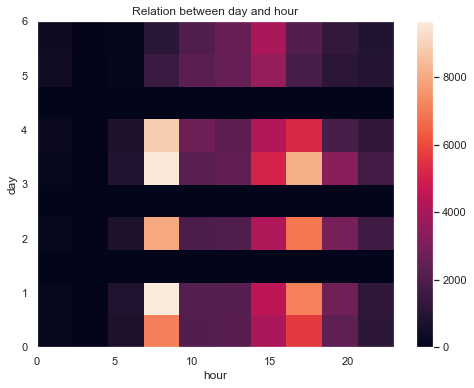

In [167]:
plt.hist2d( x = df_clean['start_time'].dt.hour , y = df_clean['start_time'].dt.weekday);
plt.ylabel('day')
plt.xlabel('hour')
plt.title('Relation between day and hour');
plt.colorbar();


- there is some active hour for every day 

## most common station combination 

start_station_name                                  end_station_name                                         
19th Street BART Station                            Grand Ave at Perkins St                                      283
2nd St at Townsend St                               Montgomery St BART Station (Market St at 2nd St)             223
                                                    San Francisco Ferry Building (Harry Bridges Plaza)           210
5th St at Virginia St                               San Fernando St at 4th St                                    215
                                                    San Fernando St at 7th St                                    242
Bancroft Way at College Ave                         Bancroft Way at Telegraph Ave                                223
Berry St at 4th St                                  San Francisco Ferry Building (Harry Bridges Plaza)           327
Bryant St at 2nd St                                 Montgomery St BART 

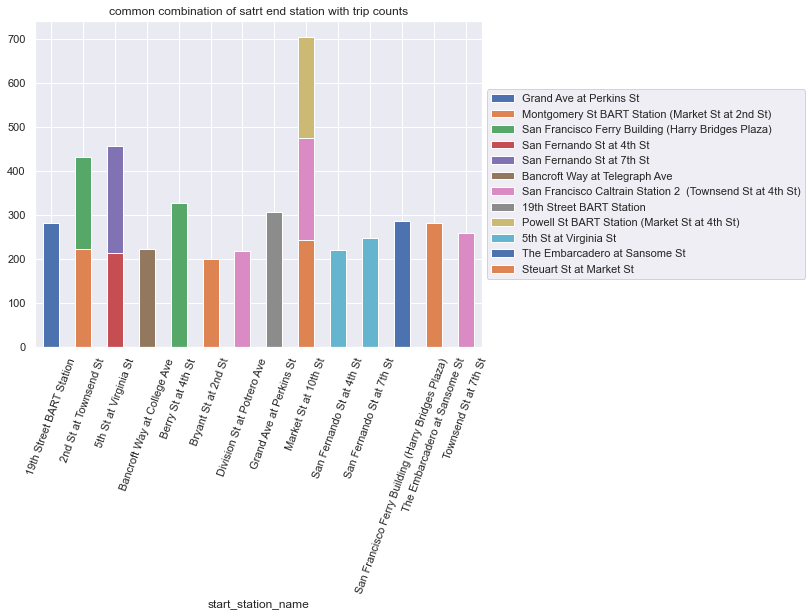

In [61]:
data = df_clean.groupby([ 'start_station_name' , 'end_station_name' ]).count()[df_clean.groupby([ 'start_station_name' , 'end_station_name' ]).count()['start_time'] > 200 ]['start_time']
data.unstack().plot(kind='bar', stacked=True );
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('common combination of satrt end station with trip counts')
plt.xticks(rotation=70)
data

##### Common start to end combination with more than 200 record 
- The most common combination is from 19th Street BART Station to  Grand Ave at Perkins St  


## multivariate visulizaton

 ## relation between distance and other parameter 

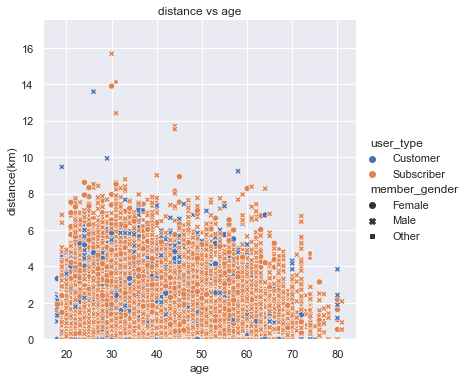

In [64]:
sns.relplot(x='age' ,y='distance' ,hue='user_type' , style='member_gender', data=df_clean );
plt.ylim(0,17.5);
rcParams['figure.figsize'] =(8,6)
plt.title('distance vs age')
plt.ylabel('distance(km)') ;


##### In general the trip distance decrease with the increase of age but it’s clear that subscribers has big distance than the customer and also male has a bigger distance than females  


# summary 

**you can find all concolusion in Ford_Bike_Analysis_Report.pdf**